In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

%matplotlib inline

In [102]:
train_data = pd.read_csv("/home/yuliya/Downloads/Training_wells.csv")
test_data = pd.read_csv("/home/yuliya/Downloads/test_data.csv")

In [3]:
train_data['X'] = train_data['X'] - 200
test_data['X'] = test_data['X'] - 200

train_data['Y'] = train_data['Y'] - 900
test_data['Y'] = test_data['Y'] - 900

# train_data['X'] = (train_data['X'] - 200) ** 2
# test_data['X'] = (test_data['X'] - 200) ** 2

# train_data['Y'] = (train_data['Y'] - 900) ** 2
# test_data['Y'] = (test_data['Y'] - 900) ** 2

train_data['XY'] = train_data['X'] * train_data['Y']
test_data['XY'] = test_data['X'] * test_data['Y']

In [4]:
train_data.head()

,Well,X,Y,NTG,XY
0,201-907,1,7,0.2006,7
1,201-914,1,14,0.3624,14
2,201-924,1,24,0.4381,24
3,202-925,2,25,0.4021,50
4,203-902,3,2,0.2628,6


In [5]:
print(f"Shape of train {train_data.shape}")
print(f"Shape of test {test_data.shape}")

Shape of train (114, 5)
Shape of test (24, 5)


In [103]:
train_data = train_data.drop('Well', axis=1)
test_data = test_data.drop('Well', axis=1)

In [97]:
train_data.head(20)

,X,Y,NTG
0,201,907,0.2006
1,201,914,0.3624
2,201,924,0.4381
3,202,925,0.4021
4,203,902,0.2628
5,203,906,0.2517
6,203,929,0.3452
7,204,904,0.2092
8,204,907,0.1974
9,205,911,0.3061


In [91]:
test_data.head()

,X,Y
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [9]:
train_data['NTG'] = train_data['NTG'] * 1000
test_data['NTG'] = test_data['NTG'] * 1000

In [104]:
test_Y = test_data['NTG']
test_data = test_data.drop(['NTG'], axis=1)

y = train_data['NTG']
X = train_data.drop(['NTG'], axis=1)

In [111]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X, y)
predicted = forest_model.predict(test_data)

In [112]:
mean_squared_error(test_Y, predicted)

0.00378326999370833

In [13]:
test_Y

0     332.2
1     246.3
2     238.1
3     390.1
4     377.5
5     238.6
6     277.8
7     189.7
8     376.9
9     277.5
10    258.4
11    248.4
12    177.0
13    376.4
14    388.2
15    428.9
16    267.4
17    413.6
18    250.0
19    366.7
20    325.0
21    367.0
22    329.9
23    490.0
Name: NTG, dtype: float64

In [94]:
predicted

array([0.32769974, 0.32769974, 0.32769974, 0.32769974, 0.32769974,
       0.32769974, 0.32769974, 0.32769974, 0.32769974, 0.32769974,
       0.32769974, 0.32769974, 0.32769974, 0.32769974, 0.32769974,
       0.32769974, 0.32769974, 0.32769974, 0.32769974, 0.32769974,
       0.32769974, 0.32769974, 0.32769974, 0.32769974])

In [52]:
import math

def RMSE(predicted, target):
    sum_x = 0
    for i in range(len(target)):
        sum_x += (predicted[i] - target[i]) ** 2
    return math.sqrt(sum_x) / len(predicted)

In [113]:
RMSE(predicted, test_Y)

0.012555327544028756

In [87]:
model = LinearRegression()
model.fit(X, y)
predicted = model.predict(test_data)
RMSE(test_Y, predicted)

0.016236454359772563

In [88]:
my_model = XGBRegressor(n_estimators=45, learning_rate=0.1, n_jobs=4)
my_model.fit(X, y, eval_set=[(X, y)], verbose=False)

predictions = my_model.predict(test_data)
RMSE(test_Y, predictions)

0.016277404691010796

In [89]:
regr = RandomForestRegressor(max_depth=100, random_state=1)
regr.fit(X, y)
predicted = regr.predict(test_data)
RMSE(test_Y, predicted)

0.016245057863043946

In [ ]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform()
# Создать объект логистической регрессии
logistic_regression = LogisticRegression(random_state=0)

In [58]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

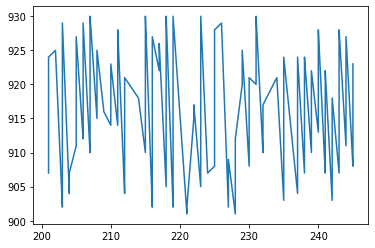

In [114]:
plt.plot(train_data.X, train_data.Y)

In [60]:
from sklearn import preprocessing
# Создать шкалировщик
minmax_scale = preprocessing.StandardScaler()
# Прошкалировать признак
scaled_feature = minmax_scale.fit_transform(np.array(train_data.X).reshape(-1, 1))

In [61]:
train_data['X'] = scaled_feature.T[0]

In [62]:
# Создать шкалировщик
minmax_scale = preprocessing.StandardScaler()
# Прошкалировать признак
scaled_feature = minmax_scale.fit_transform(np.array(train_data.Y).reshape(-1, 1))

In [63]:
train_data['Y'] = scaled_feature.T[0]

In [64]:
from sklearn import preprocessing
# Создать шкалировщик
minmax_scale = preprocessing.StandardScaler()
# Прошкалировать признак
scaled_feature = minmax_scale.fit_transform(np.array(test_data.X).reshape(-1, 1))

test_data['X'] = scaled_feature.T[0]

scaled_feature = minmax_scale.fit_transform(np.array(test_data.Y).reshape(-1, 1))
test_data['Y'] = scaled_feature.T[0]

In [65]:
train_data.head()

,X,Y,NTG
0,-1.607999,-1.076748,0.2006
1,-1.607999,-0.284087,0.3624
2,-1.607999,0.848287,0.4381
3,-1.533117,0.961524,0.4021
4,-1.458234,-1.642934,0.2628


In [81]:
from sklearn.preprocessing import Normalizer
normaiizer = Normalizer(norm="l2")
train_data['X'] = normaiizer.transform(np.array(train_data.X).reshape(-1, 1)).T[0]
train_data['Y'] = normaiizer.transform(np.array(train_data.Y).reshape(-1, 1)).T[0]
test_data['X'] = normaiizer.transform(np.array(test_data.X).reshape(-1, 1)).T[0]
test_data['Y'] = normaiizer.transform(np.array(test_data.Y).reshape(-1, 1)).T[0]